In [7]:
import sys
sys.path.append('C:\\Users\\dana\\Documents\\Ido\\follow_up_project\\code\\benchmarker')

In [8]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import mpld3
from pathlib import Path

from benchmark import Benchmark
from utils.utils import *
from utils.visual_utils import *

mpld3.enable_notebook()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
project_root = 'C:\\Users\\dana\\Documents\\Ido\\follow_up_project'
data_root = os.path.join(project_root, 'datasets', 'efi')
images_root = os.path.join(data_root, 'images', 'good')
labels_root = os.path.join(data_root, 'labels', 'fused')
results_root =os.path.join(project_root, 'benchmark', '')

In [12]:
bm = Benchmark("experiment", fake=True, persist=False)
# bm = Benchmark("experiment")
bm.parse_experiment_results(images_root, labels_root, results_root)
bm.calc_stats(thresholds=np.linspace(0, 1, 11))
# bm.calc_stats()

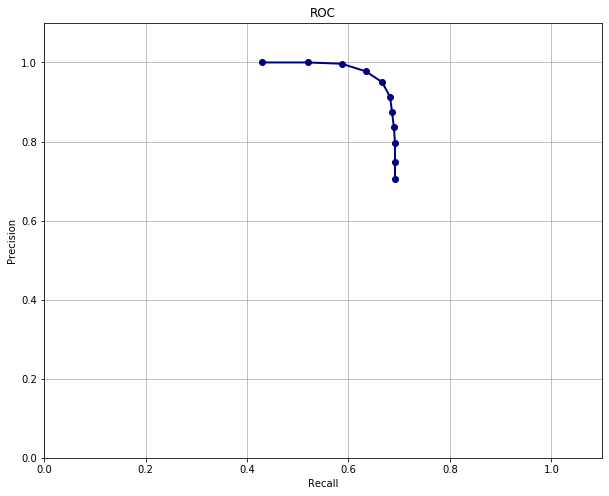

In [13]:
plt.figure(figsize=(10, 8))
lw = 2
pr = [p_r_dict['precision'] for p_r_dict in bm.roc.values()]
rc = [p_r_dict['recall'] for p_r_dict in bm.roc.values()]
plt.plot(rc, pr, 'ro', color='navy', lw=lw, linestyle='-')
plt.xlim([0.0, 1.1])
plt.ylim([0.0, 1.1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('ROC')
plt.grid()
plt.show()

828


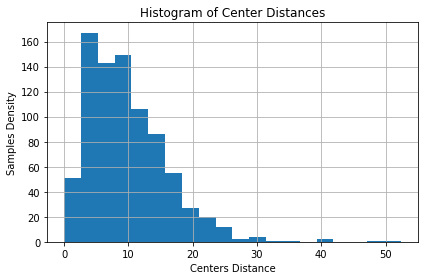

In [14]:
fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(bm.center_dist_list, 20)#, density=1)
print(len(bm.center_dist_list))
# add a 'best fit' line
ax.set_xlabel('Centers Distance')
ax.set_ylabel('Samples Density')
ax.set_title(r'Histogram of Center Distances')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.grid()
plt.show()


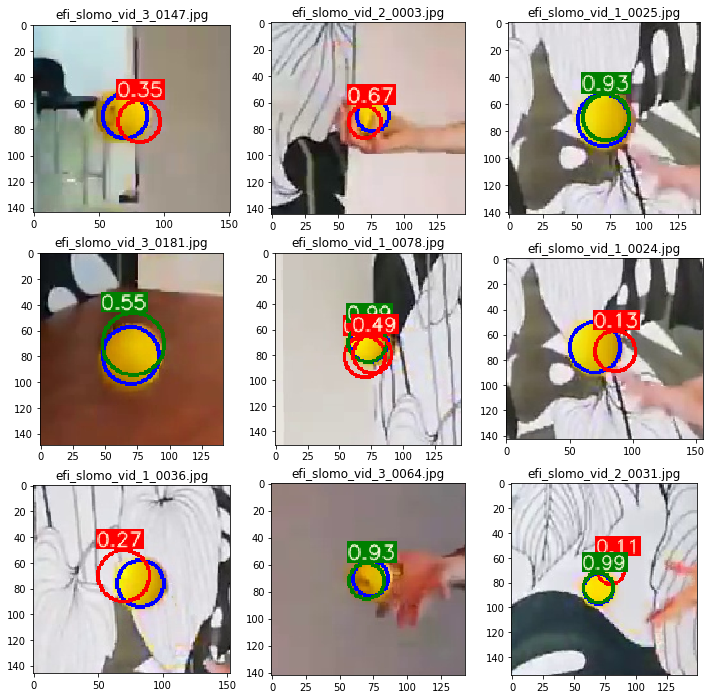

In [15]:
GREEN = (0, 128, 0)
RED = (0, 0, 255)
NEUTRAL = (255, 0, 0)

samples = bm.choose_samples(num_samples=9, cond=Benchmark.has_labels)

_, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.flatten()
for sample, ax in zip(samples, axs):
    im = create_sample_visualization(sample, 0.5, GREEN, RED, NEUTRAL, crop=True, color_mode='rgb')
    ax.imshow(im)
    ax.set_title(Path(sample.path).name)